In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_dir = '/content/drive/MyDrive/archive (7)/dogvscat/test'
train_dir = '/content/drive/MyDrive/archive (7)/dogvscat/train'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',padding = "same", input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

<ipython-input-22-d65c8340c7ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/10
25/25 [==============================] - 15s 453ms/step - loss: 0.6193 - accuracy: 0.6580 - val_loss: 0.6997 - val_accuracy: 0.6000
Epoch 2/10
25/25 [==============================] - 12s 461ms/step - loss: 0.5253 - accuracy: 0.7280 - val_loss: 0.6764 - val_accuracy: 0.6500
Epoch 3/10
25/25 [==============================] - 12s 487ms/step - loss: 0.4770 - accuracy: 0.7820 - val_loss: 0.7768 - val_accuracy: 0.6750
Epoch 4/10
25/25 [==============================] - 12s 489ms/step - loss: 0.4084 - accuracy: 0.7980 - val_loss: 0.7012 - val_accuracy: 0.7000
Epoch 5/10
25/25 [==============================] - 12s 463ms/step - loss: 0.3004 - accuracy: 0.8700 - val_loss: 1.0588 - val_accuracy: 0.6750
Epoch 6/10
25/25 [==============================] - 13s 507ms/step - loss: 0.2755 - accuracy: 0.8840 - val_loss: 0.7227 - val_accuracy: 0.7500
Epoch 7/10
25/25 [==============================] - 11s 453ms/step - loss: 0.2068 - accuracy: 0.9100 - val_loss: 1.0660 - val_accuracy: 0.6750

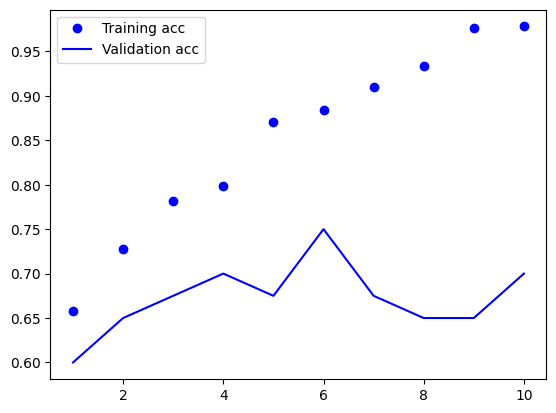

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

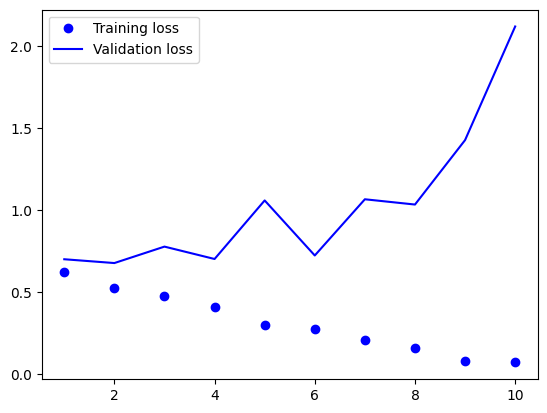

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [ ]:
model.save('catvsdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


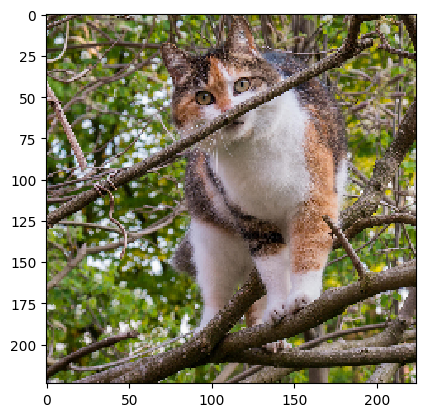

1/1 [==============================] - 0s 18ms/step
cat


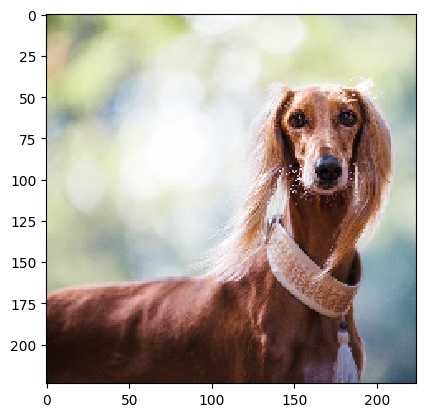

1/1 [==============================] - 0s 18ms/step
dog


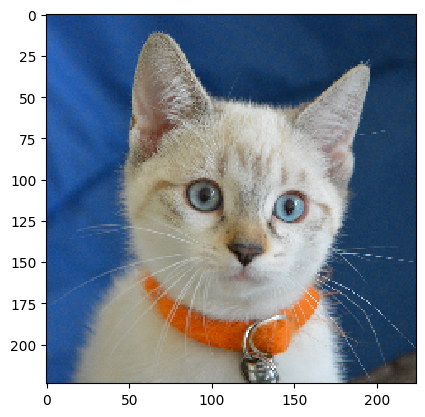

1/1 [==============================] - 0s 21ms/step
dog


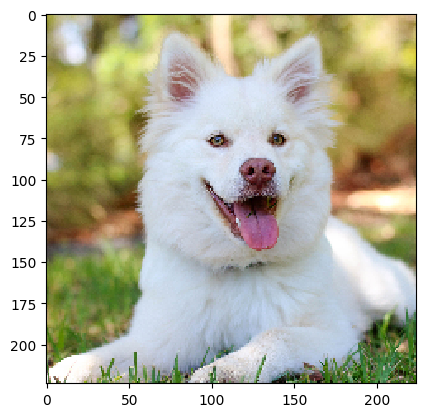

1/1 [==============================] - 0s 20ms/step
dog


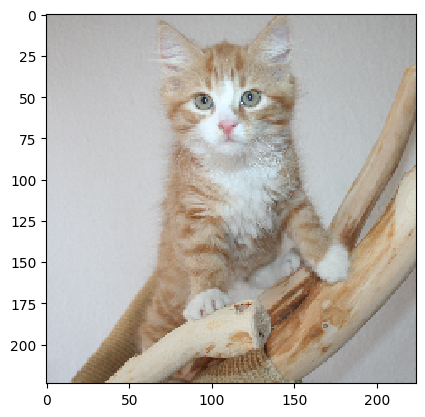

1/1 [==============================] - 0s 18ms/step
dog


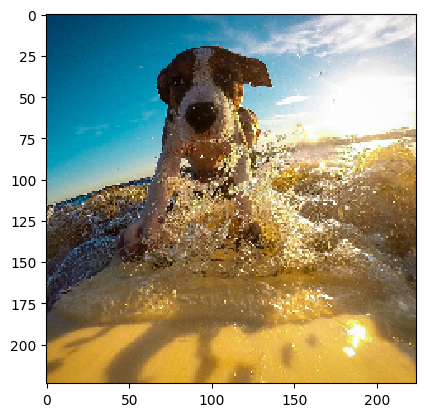

1/1 [==============================] - 0s 18ms/step
dog


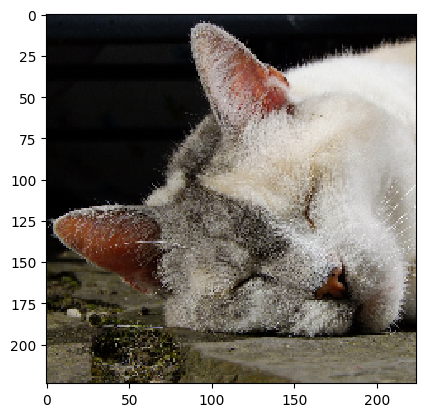

1/1 [==============================] - 0s 18ms/step
cat


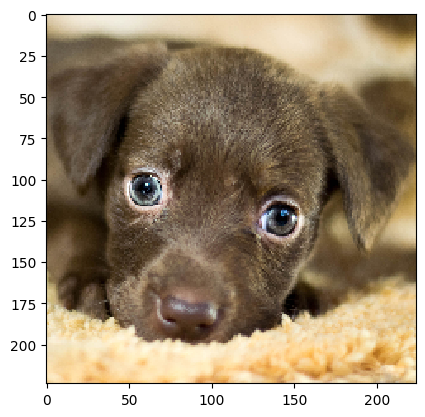

1/1 [==============================] - 0s 26ms/step
dog


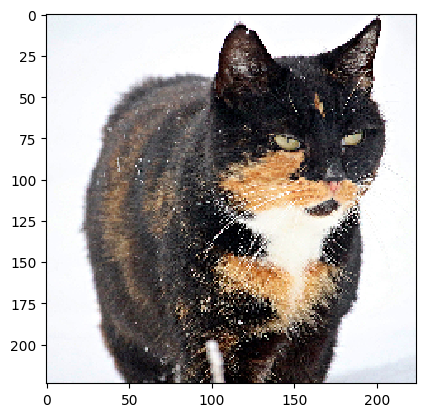

1/1 [==============================] - 0s 19ms/step
cat


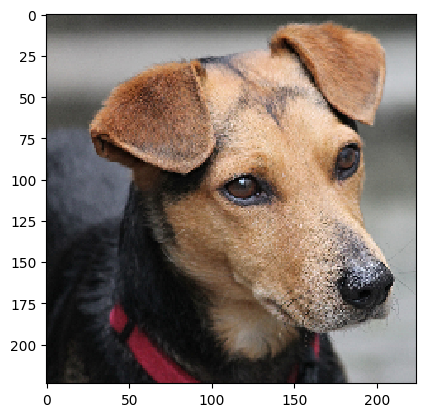

1/1 [==============================] - 0s 21ms/step
dog


In [ ]:
from tensorflow.keras.preprocessing import image
for i in range(10):
  path =f'/content/drive/MyDrive/archive (7)/dogvscat/train/{i%2}/12{i}.jpg'
  img = image.load_img(path,target_size=(224,224))
  plt.imshow(img,interpolation='nearest')
  plt.show()
  img_array = np.array(img)
  img_array.shape
  img_array=img_array.reshape(1,224,224,3)
  a = model.predict(img_array)
  if a==[[0]]:
      print('cat')
  else:
      print('dog')

In [ ]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [ ]:
img_array=img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 85ms/step
cat


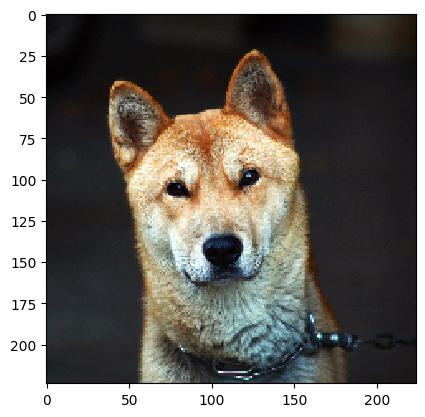

1/1 [==============================] - 0s 18ms/step
dog


In [ ]:
from tensorflow.keras.preprocessing import image
path ='/content/drive/MyDrive/archive (7)/dogvscat/train/1/246.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()
img_array = np.array(img)
img_array=img_array.reshape(1,224,224,3)
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')